# Pulse Level Learning

In this notebook, we will train a reinforcement learning agent to learn pulse level control of a quantum system. The configuration is drawn from two dedicated yaml files respectively describing the quantum environment and the agent. The quantum environment is a `QuantumEnvironment` object, which is a subclass of `gym.Env ` and is designed to be compatible with standard RL libraries. The agent on the other hand, is specifically hard coded for our need because of the need to be able to send to the same resource (the Estimator primitive) a batch of quantum circuits (in contrast with usual RL frameworks where actions can be evaluated in parallel).

In [1]:
%matplotlib inline
from template_configurations.qiskit.pulse_level.pulse_config import (
    q_env_config as pulse_q_env_config,
    circuit_context,
)
from quantumenvironment import QuantumEnvironment
from context_aware_quantum_environment import ContextAwareQuantumEnvironment
from gymnasium.wrappers import RescaleAction, ClipAction
from qiskit.circuit import QuantumCircuit
from helper_functions import simulate_pulse_schedule
from qiskit.quantum_info import Operator, Statevector
from qiskit import pulse
import numpy as np

/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


{'optimization_level': 3, 'resilience_level': None, 'max_execution_time': None, 'execution': {'init_qubits': True, 'rep_delay': None}, 'resilience': {'measure_mitigation': None, 'measure_noise_learning': {'num_randomizations': None, 'shots_per_randomization': None}, 'zne_mitigation': False, 'zne': {'noise_factors': None, 'extrapolator': None}, 'pec_mitigation': False, 'pec': {'max_overhead': None, 'noise_gain': None}, 'layer_noise_learning': {'max_layers_to_learn': None, 'shots_per_randomization': None, 'num_randomizations': None, 'layer_pair_depths': None}}, 'environment': {'log_level': 'WARNING', 'job_tags': None}, 'simulator': {'seed_simulator': 100, 'coupling_map': None, 'basis_gates': None}}
Custom backend used
Starting Rabi experiment for qubit 0...
Rabi experiment for qubit 0 done.
Starting Drag experiment for qubit 0...
Drag experiments done for qubit 0 done.
Starting Rabi experiment for qubit 1...
Rabi experiment for qubit 1 done.
Starting Drag experiment for qubit 1...
Drag e

In [2]:
use_context = False
if use_context:
    q_env = ContextAwareQuantumEnvironment(
        pulse_q_env_config, circuit_context, training_steps_per_gate=250
    )
else:
    q_env = QuantumEnvironment(pulse_q_env_config)
# from qiskit.primitives import Estimator
# q_env.estimator = Estimator()
rescaled_env = RescaleAction(ClipAction(q_env), -1.0, 1.0)

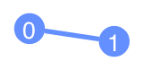

In [3]:
from qiskit.visualization import plot_gate_map

plot_gate_map(q_env.backend)

In [4]:
from helper_functions import load_from_yaml_file

agent_config = load_from_yaml_file(
    "/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/template_configurations/agent_config.yaml"
)

# import yaml

# with open(
#         "/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/template_configurations/agent_config.yaml",
#         "r",
# ) as f:
#     agent_config = yaml.safe_load(f)

In [5]:
from ppo import CustomPPO

ppo_agent = CustomPPO(agent_config, q_env)

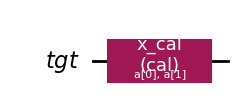

In [6]:
circuit = q_env.circuit_truncations[0]
circuit.draw("mpl")

In [7]:
circuit.calibrations

{'x_cal': {((0,),
   (ParameterVectorElement(a[0]),
    ParameterVectorElement(a[1]))): ScheduleBlock(ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=6.2998680105, amp=a[0], angle=a[1]), DriveChannel(0)), name="x", transform=AlignLeft()), name="custom_sched", transform=AlignLeft())}}

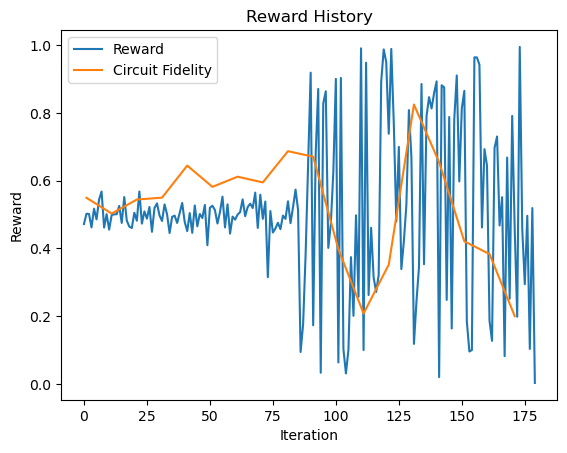

 60%|██████    | 180/300 [07:14<04:53,  2.44s/it]

Average fidelity of last gate: 0.20068754491995866
Sending Estimator job...
{'x_cal': {((0,), (ParameterVectorElement(a[0]), ParameterVectorElement(a[1]))): ScheduleBlock(ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=6.2998680105, amp=a[0], angle=a[1]), DriveChannel(0)), name="x", transform=AlignLeft()), name="custom_sched", transform=AlignLeft())}}
SparsePauliOp(['I', 'Z'],
              coeffs=[ 0.5+0.j, -0.5+0.j])
Time to run simulation:  0.5998568534851074


 60%|██████    | 181/300 [07:15<04:11,  2.11s/it]

Finished Estimator job
Time taken 1.2889039516448975
Sending Estimator job...
{'x_cal': {((0,), (ParameterVectorElement(a[0]), ParameterVectorElement(a[1]))): ScheduleBlock(ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=6.2998680105, amp=a[0], angle=a[1]), DriveChannel(0)), name="x", transform=AlignLeft()), name="custom_sched", transform=AlignLeft())}, 'h': {((0,), ()): ScheduleBlock(ScheduleBlock(ShiftPhase(-1.5707963268, DriveChannel(0)), ShiftPhase(-1.5707963268, ControlChannel(1)), name="rz0", transform=AlignLeft()), ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=0, amp=0.05932775, angle=0), DriveChannel(0)), name="sx", transform=AlignLeft()), ScheduleBlock(ShiftPhase(-1.5707963268, DriveChannel(0)), ShiftPhase(-1.5707963268, ControlChannel(1)), name="rz0", transform=AlignLeft()), name="h", transform=AlignLeft())}}
SparsePauliOp(['I', 'X'],
              coeffs=[0.5+0.j, 0.5+0.j])
Time to run simulation:  0.9558200836181641


 61%|██████    | 182/300 [07:18<04:27,  2.27s/it]

Finished Estimator job
Time taken 2.571591854095459
Sending Estimator job...
{'x_cal': {((0,), (ParameterVectorElement(a[0]), ParameterVectorElement(a[1]))): ScheduleBlock(ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=6.2998680105, amp=a[0], angle=a[1]), DriveChannel(0)), name="x", transform=AlignLeft()), name="custom_sched", transform=AlignLeft())}, 'x': {((0,), ()): ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=6.2998680105, amp=0.1186555, angle=0), DriveChannel(0)), name="x", transform=AlignLeft())}}
SparsePauliOp(['I', 'Z'],
              coeffs=[0.5+0.j, 0.5+0.j])


 61%|██████    | 182/300 [07:18<04:44,  2.41s/it]


KeyboardInterrupt: 

In [8]:
ppo_agent.train(
    total_updates=300, print_debug=False, num_prints=10, clear_history=False
)

In [ ]:
import matplotlib.pyplot as plt

reward_history = np.array(q_env.reward_history)
mean_rewards = np.mean(reward_history, axis=-1)
max_mean = int(np.max(mean_rewards) * 1e4) / 1e4
n_epochs = len(mean_rewards)
fidelity_range = np.arange(0, n_epochs, q_env.benchmark_cycle)
plt.plot(mean_rewards, label=f"Mean Batch Rewards, max: {max_mean / 2}")
plt.plot(
    fidelity_range,
    np.array(q_env.avg_fidelity_history),
    label="Average Fidelity (mean over batch)",
)
plt.xlabel("Updates")
plt.ylabel("Reward")
plt.title(f"{q_env.target['gate'].name} Learning Curve")
plt.legend()
plt.show()

In [ ]:
print("Optimal action", q_env.optimal_action)
print("Best fidelity:", np.max(q_env.avg_fidelity_history))

In [ ]:
# Update the gate calibration in the backend target and retrieve the calibration
optimal_calibration = q_env.update_gate_calibration()
q_env.backend.target.get_calibration("ecr", (0, 1)).draw()

In [ ]:
from helper_functions import simulate_pulse_schedule
from qiskit.circuit.library import CXGate, HGate, RZGate, ECRGate
from qiskit.quantum_info import average_gate_fidelity, Operator, Statevector

data = simulate_pulse_schedule(
    q_env.backend,
    optimal_calibration,
    target_unitary=Operator(ECRGate()),
)

print(data)

In [ ]:
# Testing gate in a quantum circuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw("mpl")

basic_simulator = BasicSimulator()
basic_result = basic_simulator.run(qc).result()

pulse_circ = transpile(qc, q_env.backend)
q_env.backend.options.shots = 1000
pulse_results = q_env.backend.run(pulse_circ).result()

print("BasicProvider: ", basic_result.get_counts())
print("Custom Backend:", pulse_results.get_counts())

In [ ]:
pulse_circ.draw("mpl")

In [ ]:
# Testing the pulse schedule
from qiskit import schedule

pulse_schedule = schedule(
    pulse_circ.remove_final_measurements(inplace=False), q_env.backend
)
pulse_schedule.draw()

In [ ]:
# Testing the pulse schedule
pulse_sim_results = simulate_pulse_schedule(
    q_env.backend,
    pulse_schedule,
    target_unitary=Operator(pulse_circ.remove_final_measurements(inplace=False)),
    target_state=(Statevector.from_label("00") + Statevector.from_label("11"))
                 / np.sqrt(2),
)
print(pulse_sim_results)

In [ ]:
new_circ = transpile(
    pulse_circ.remove_final_measurements(inplace=False),
    q_env.backend,
    scheduling_method="asap",
)
new_circ.draw("mpl")

In [ ]:
new_circ.op_start_times

In [ ]:
instruction_list = []
for instruction in new_circ.data:
    instruction_list.append(instruction.operation.name)
instruction_list